In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.preprocessing import image


In [3]:
import pathlib
import os
data_dir_train=r"E:\tree_data\train"
data_dir_train = pathlib.Path(data_dir_train)
data_dir_test=r"E:\tree_data\test"
data_dir_test = pathlib.Path(data_dir_test)
data_dir_val=r"E:\tree_data\validation"
data_dir_val = pathlib.Path(data_dir_val)
image_count_train= len(list(data_dir_train.glob('*/*')))
image_count_test= len(list(data_dir_test.glob('*/*')))
image_count_val= len(list(data_dir_val.glob('*/*')))
print("total image:",image_count_train+image_count_test+image_count_val)
print("train data 70%: ",image_count_train,"image")
print("test data 20%: ",image_count_test,"image")
print("validation data 10%: ",image_count_val,"image")


total image: 960
train data 70%:  672 image
test data 20%:  192 image
validation data 10%:  96 image


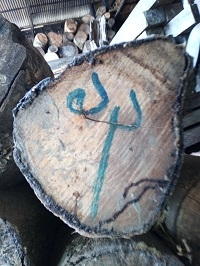

In [4]:
mango = list(data_dir_train.glob('Mango/*'))
PIL.Image.open(str(mango[0]))

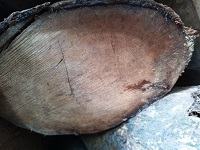

In [5]:
PIL.Image.open(str(mango[1]))

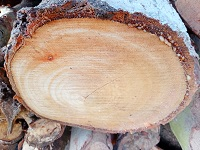

In [6]:
ashoke = list(data_dir_train.glob('Ashoke/*'))
PIL.Image.open(str(ashoke[0]))

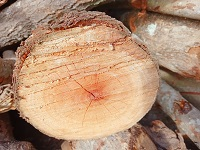

In [7]:
PIL.Image.open(str(ashoke[1]))

In [8]:
batch_size = 9
epochs=1
img_height = 224
img_width = 224

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 672 files belonging to 14 classes.


In [10]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 192 files belonging to 14 classes.


In [11]:
class_names = train_ds.class_names
print(class_names)

['Arjun', 'Ashoke', 'Litchi', 'Mango', 'Mehgoni', 'Neem', 'Raj koroi', 'Segun', 'Shemul', 'Tamarind', 'Ucliptus', 'jack Fruit', 'jam', 'pahari Gamai']


In [12]:
class_names = test_ds.class_names
print(class_names)

['Arjun', 'Ashoke', 'Litchi', 'Mango', 'Mehgoni', 'Neem', 'Raj koroi', 'Segun', 'Shemul', 'Tamarind', 'Ucliptus', 'jack Fruit', 'jam', 'pahari Gamai']


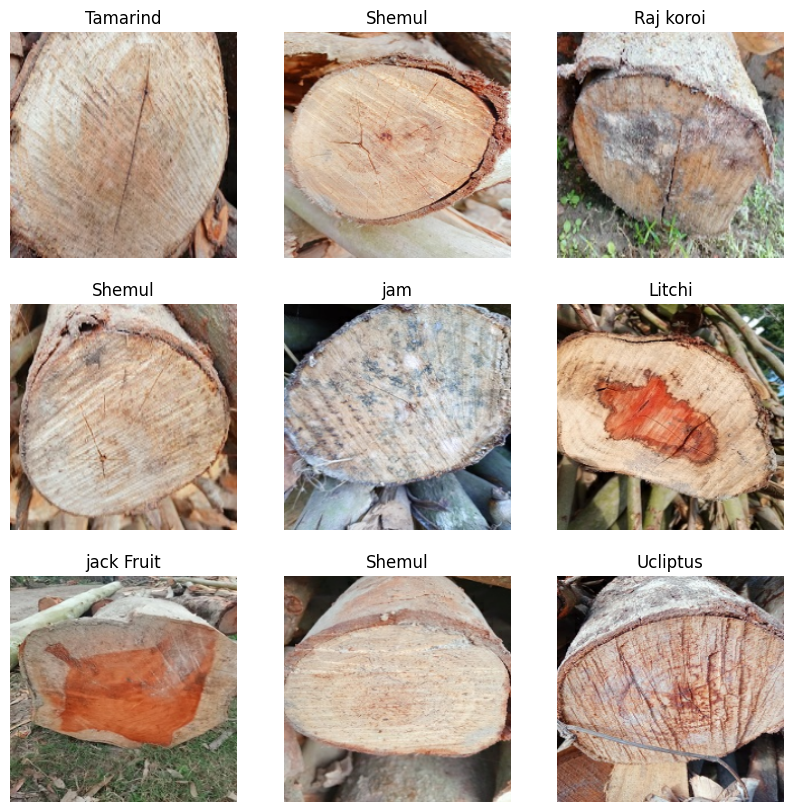

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(9, 224, 224, 3)
(9,)


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [16]:
normalization_layer = layers.Rescaling(1./255)

In [17]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [18]:
from keras.layers import Input,Flatten,Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.densenet import DenseNet121
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import InceptionV3
from keras.models import Sequential
from glob import glob

In [19]:
num_classes = len(class_names)


In [20]:
model_vgg16 =VGG16(weights='imagenet')
model_dn121 =DenseNet121(weights='imagenet')
model_inc =InceptionV3(weights='imagenet')
model_vgg19 =VGG19(weights='imagenet')
model_rn50 =ResNet50(weights='imagenet')
model_rn101 =ResNet101(weights='imagenet')
model_eff =EfficientNetB3(weights='imagenet')
model_vgg16.summary()
model_dn121.summary()
model_inc.summary()
model_vgg19.summary()
model_rn50.summary()

179648224/179648224 [==============================] - 24s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [21]:
model_vgg16.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

########################################............................##################################
# history_vgg16 =model_vgg16.fit(
#   train_ds,
#   validation_data=test_ds,
#   epochs=epochs
# )

In [22]:
model_vgg16.save('models/vgg_16.h5')

In [23]:
model_dn121.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

########################################...............................###################################
# history_dn121 =model_dn121.fit(
#   train_ds,
#   validation_data=test_ds,
#   epochs=epochs
# )

In [24]:
model_dn121.save('models/DenseNet_121.h5')

In [25]:
model_vgg19.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

########################################.............................#####################################
# history_vgg19 =model_vgg19.fit(
#   train_ds,
#   validation_data=test_ds,
#   epochs=epochs
# )

In [26]:
model_vgg19.save('models/Vgg_19.h5')

In [27]:
model_rn50.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

########################################......................######################################
# history_rn50 =model_rn50.fit(
#   train_ds,
#   validation_data=test_ds,
#   epochs=epochs
# )

In [28]:
model_rn50.save('models/Resnet_50.h5')

In [29]:
model_inc.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [30]:
model_inc.save('models/InceptionNet_v3.h5')

In [31]:
model_eff.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model_eff.save('models/EfficientNet_B3.h5')

In [33]:
model_rn101.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model_rn101.save('models/Resnet_101.h5')